# AI Toolkits Assignment 1

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test


## 1. Linear Regression

### 1.1 Least Squares

In [2]:
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************


   
    xt_x = np.dot(tx.T, tx)  # X_transpose * X
    
    #det계산  np.linalg.det 없이
    
    det_xt_x = xt_x[0, 0] * xt_x[1, 1] - xt_x[0, 1] * xt_x[1, 0]
    
    #det를 이용하여 inverse_tx 계산
    inv_xt_x = np.array([[xt_x[1, 1], -xt_x[0, 1]],
                           [-xt_x[1, 0], xt_x[0, 0]]]) / det_xt_x
    
    # w = (tx_transpose * tx)inverse * tx_transpose *y 
    # w = (xt_x)inverse * (tx_transpose *y)
    # w = inv_xt_x    *   (tx_transpose *y)
    w = np.dot(inv_xt_x, np.dot(tx.T, y))
    
    predicted_value = np.dot(tx, w)
    #MSE = (test_value - predicted_value)^2 / len(test_value)
    MSE =  np.mean((y - predicted_value)**2)
    
    return w, MSE
    raise NotImplementedError

In [3]:
test(least_squares)

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 13, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    (array([ 0.21212121, -0.12121212]), 5.623715437610729e-32)
**********************************************************************


### 1.2 Classification Using Linear Regression
Load your given data to the system.

In [4]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
#print(height.shape)  #1.846  #(10000,0)
#print(weight.shape) #(10000,0)
y = np.expand_dims(gender, axis=1)
#print(y)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
#print(weight.reshape(-1))
#print(X.shape) #(10000,2)
y, X = sample_data(y, X, seed, size_samples=200)
#print(y)
#print(X)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

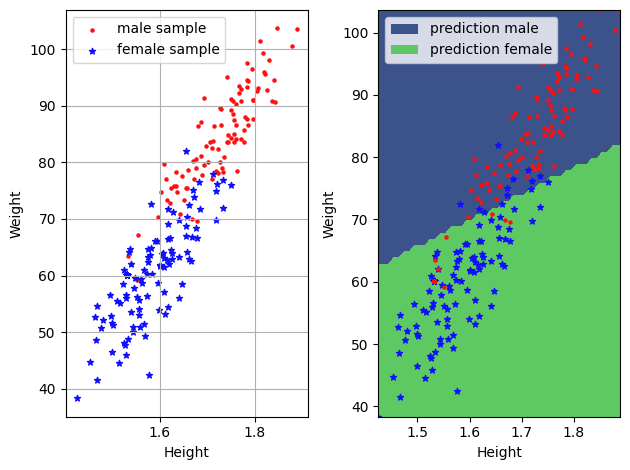

In [5]:
from plots import visualization


def least_square_classification_visualize(y, x):
    """Least square demo

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    # w = least squares with respect to tx and y
    slice_tx =tx[:,1:3]
    #print(tx.shape[0]) # shape[0], shape[1]를 이용하여 전체 행의 갯수와 열의 갯수를 반환받을 수 있다.
    #print(tx)
    w, MSE =least_squares(y,slice_tx)
    #print(slice_tx.shape) #(200,2)
    #print(slice_tx)  #(-1.2267, -8.021)
    #print(tx.shape) #(200,3)
    #print(tx.shape[0]) #200 # shape[0], shape[1]를 이용하여 전체 행의 갯수와 열의 갯수를 반환받을 수 있다.
    #print(tx) #(1.0 , -1.2267 , -8.021)
    #print(w)
    #print(MSE)
    #fdfd = np.vstack([w,MSE])
    #print(fdfd)
    
    w = np.vstack([0.5,w])
    
    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")


least_square_classification_visualize(y, x)

## 2. Logistic Regression

### 2.1 Implement logsitc regression using gradient descent

In [2]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # 시그모이드 공식
    a = 1 / (1 + np.exp(-t))
    return a
    # ***************************************************
    
    
    raise NotImplementedError


test(sigmoid)

✅ Your `sigmoid` passed 2 tests.


Compute your cost by negative log likelihood.

In [20]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    least square 부분 참고
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        y (=predicted_value) = np.dot(tx, w)
    
    
    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    #print(tx.shape[0]) # shape[0] 이용하여 전체 행의 갯수를 반환받을 수 있다.
                        # shape[1] 이용하여 전체 열의 갯수를 반환받을 수 있다.
    assert y.shape[0] == tx.shape[0]     #assert N == N
    assert tx.shape[1] == w.shape[0]     #assert D == D

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    # Calculate a as sigmoid of the dot product of tx and w
    a = sigmoid(tx.dot(w))
    
    # Loss 계산 by negative log likelihood(NLL) 은 Binary - cross Entropy 라고도 한다 
    loss = -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / y.shape[0]
    
    
    return loss

    raise NotImplementedError



test(calculate_loss)

✅ Your `calculate_loss` passed 4 tests.


Compute the gradient of loss.

In [21]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

        
    
    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    
    # a는 prediction value_y   
    a = sigmoid(tx.dot(w))
    # y는 실제값 a는 예측값
    error = y - a
    # Loss를 편미분w 한 값 = gradient  # gradient는 Loss의 weight에 대한 편미분으로 정의 
    gradient = -tx.T.dot(error) / y.shape[0]
    return gradient
    
    raise NotImplementedError("Calculate gradient")


test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


#### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [24]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    a = sigmoid(tx.dot(w))
    # y는 실제값 a는 예측값
    error = y - a
    
    # y: shape= [2, 1]
    # error: shape= [2, 1]
    # tx: shape= [2, 3]
    # Loss를 편미분w 한 값 = gradient  # gradient는 Loss의 weight에 대한 편미분으로 정의 
    gradient = -tx.T.dot(error) / y.shape[0]
    
    #print(gradient.shape)
    #gradient: shape = [3, 1]
    w = w - gamma * gradient
   
    # w: shape= [3, 1]
    loss = calculate_loss(y, tx, w)
    #print(y.shape)
    return loss, w
    
    raise NotImplementedError



test(learning_by_gradient_descent)

❌ The are some issues with your implementation of `learning_by_gradient_descent`:
**********************************************************************
File "__main__", line 21, in learning_by_gradient_descent
Failed example:
    round(loss, 8)
Expected:
    0.62137268
Got:
    0.59181141
**********************************************************************


Visualize!

Current iteration=0, loss=0.5711340417430999
Current iteration=100, loss=0.2569709837317167
Current iteration=200, loss=0.2353093720042002
Current iteration=300, loss=0.22394311720334215
Current iteration=400, loss=0.21738872491483227
Current iteration=500, loss=0.21334653760414796
Current iteration=600, loss=0.21072856395805978
Current iteration=700, loss=0.20897000956779407
Current iteration=800, loss=0.2077553734377046
Current iteration=900, loss=0.206897966228406
Current iteration=1000, loss=0.2062821509155122
Current iteration=1100, loss=0.2058336150756226
Current iteration=1200, loss=0.2055031474299544
Current iteration=1300, loss=0.20525734193945225
Current iteration=1400, loss=0.20507304871910442
Current iteration=1500, loss=0.2049339445540862
Current iteration=1600, loss=0.20482834952787088
Current iteration=1700, loss=0.20474780099131754
Current iteration=1800, loss=0.20468610131438958
Current iteration=1900, loss=0.20463866962483862
Current iteration=2000, loss=0.20460209298

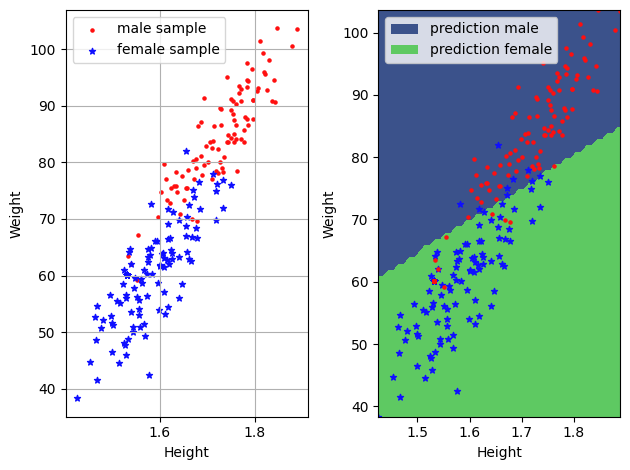

In [10]:
def logistic_regression_gradient_descent_visualize(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(
        y,
        x,
        mean_x,
        std_x,
        w,
        "classification_by_logistic_regression_gradient_descent",
        True,
    )
    print("loss={l}".format(l=calculate_loss(y, tx, w)))




logistic_regression_gradient_descent_visualize(y, x)